# PyTorch
PyTorch is a Python-based scientific computing package serving two broad purposes:

* A replacement for NumPy to use the power of GPUs and other accelerators.
* An automatic differentiation library that is useful to implement neural networks.

PyTorch also comes with various libraries:
* torchvision: datasets, model architectures and image transformations for computer vision
* torchtext: data processing utilities and popular datasets for natural language
* torchaudio: I/O, data sets and transformations for audio processing

https://pytorch.org/

## Other Frameworks
https://aotu.ai/en/blog/2020/09/28/comparison-between-common-deep-learning-frameworks/
* TensorFlow (1 and 2)
* Keras
* Caffe
* DarkNet

## Tensors
* Data structure similar to arrays (numpy) and matrices
* Used for input and output of models (DNNs)
* Optimized for GPU processing

### Initialization
From sequential data types, e.g. lists

In [2]:
import torch

a = [[1,2],[3,4]]
t = torch.tensor(a)
print(t)
print(t.shape)

a = t.data
print(a)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])
tensor([[1, 2],
        [3, 4]])


From a NumPy array

In [3]:
import numpy as np

n = np.array([[1,2],[3,4]])
print(n)
t = torch.from_numpy(n)
print(t)
n = t.numpy()
print(n)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
[[1 2]
 [3 4]]


From another tensor

In [4]:
t_ones = torch.ones_like(t)
print(t_ones)

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)


With random or constant values

In [5]:
shape = (2,3)
t_rand = torch.rand(shape)
print(t_rand)

tensor([[0.2533, 0.7408, 0.4821],
        [0.9682, 0.8013, 0.8768]])


In [6]:
t_ones = torch.ones(shape)
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
t_zeros = torch.zeros(shape)
print(t_zeros)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes

In [8]:
print(t_rand.shape)
print(t_rand.dtype)
print(t_rand.device)

torch.Size([2, 3])
torch.float32
cpu


### Tensor Operations
Similar to NumPy

**Indexing and Slicing:**

In [9]:
t = torch.ones(4, 4)
t[:,1] = 0
print(t)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Concatenation:**

In [10]:
t_cat = torch.cat([t, t, t], dim=1)
print(t_cat)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Multiplication:**

Element-wise Multiplication:

In [11]:
print(t.mul(t))
print(t*t)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Matrix Multiplication:

In [12]:
print(t.matmul(t))
print(t @ t)

tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])
tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


### Bridge to NumPy
**Tensor to NumPy array:**

In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Both tensor and array share the same memory (reference):

In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


**NumPy array to Tensor:**

In [15]:
n = np.ones(5)
t = torch.from_numpy(n)
print(f"n: {n}")
print(f"t: {t}")

n: [1. 1. 1. 1. 1.]
t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## Datasets & Dataloaders
* Decoupling of model training and dataset code
* torch.utils.data.Dataset stores samples (e.g. Images) and labels (e.g. true classes)
* torch.utils.data.DataLoader provides easy access to the samples (iterable)
* torchvision provides pre-loaded datasets for prototyping

### Loading a Dataset
* Various datasets can be downloaded
* Transforms can be specified (e.g. ToTensor())

In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualizing the Dataset
* Access to samples via indexing (like a list)
* Visualization using matplotlib

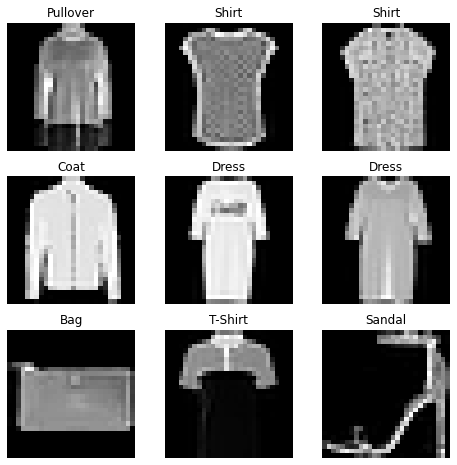

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Using a DataLoader
* provide "minibatches"
* reshuffle the data
* use multiprocessing for speed up

In [18]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate over data
* Each iteration returns a minibatch of samples and and their labels
* Data is shuffled

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


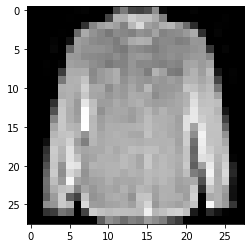

Label: 6


In [19]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transforms
* make data suitable for training (e.g. normalization, conversion to tensor)
* transforms for modifying the samples (e.g. images)
* target_transforms for modifying the labels (annotations)

In [20]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose, Resize

transforms = Compose([Resize((64,64)), ToTensor()])

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms
)

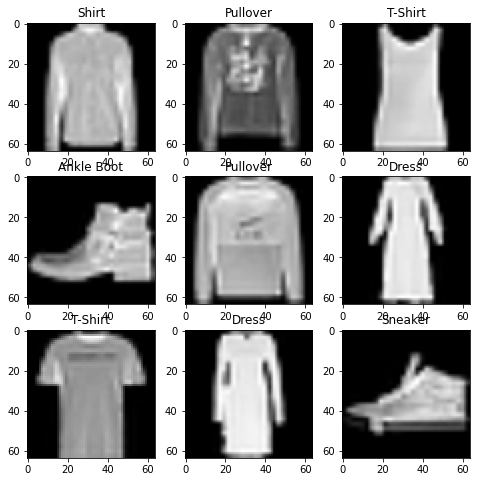

In [21]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(ds), size=(1,)).item()
    img, label = ds[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    #plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Create a Neural Network

* every module (e.g. a Neural Network) has to inherit from torch.nn.Module
* NNs consist of layers which are also represented by modules

### Training Device
* CPU or GPU (cuda)

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Define the model
* create subclass of nn.Module
* initialize Layers in the constructor (__init__)
* mandatory forward method for specification of data flow (input->output)

In [23]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), #fully connected layer
            nn.ReLU(), #ReLU layer
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [24]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


* To run the model, pass the input data
* Do not call model.forward() directly

In [25]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(logits.shape)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1) #takes the class with highest prob
print(f"Predicted class: {y_pred}")

torch.Size([1, 10])
Predicted class: tensor([7], device='cuda:0')


### Model Layers
* Flatten: creates 1-D array from image
* Linear: fully connected layer (linear transformation)
* ReLU: non-linear activation
* Sequential: Concat layers to be processed sequentially
* Softmax: Scales output of previous layer to [0, 1]

### Model Parameters
* Most layers have parameters that are optimized during training
* Can be accessed and monitored by parameters() and named_parameters() mehtods

In [26]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0015,  0.0154, -0.0019,  ...,  0.0115, -0.0148,  0.0028],
        [ 0.0104, -0.0181, -0.0044,  ..., -0.0290, -0.0213,  0.0303]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0277, -0.0131], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0395,  0.0359, -0.0439,  ...,  0.0040, -0.0059,  0.0300],
        [ 0.0080,  0.0205,  0.0234,  ...,  0.0372,  0.0026, -0.0400]],
       device='cuda

## Autograd
Neural networks require to compute and track gradients during training. PyTorch provides the autograd library to do this for you. Without deep learning knowledge, explanation of the autograd functionality is beyond this tutorial. If you are interested, you can read details here: 
* https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

In [29]:
# Let's say we want to preprocess some saved weights and use
# the result as new weights.
weights = torch.tensor([0.1, 0.2, 0.3], requires_grad=True)  # some function
print("weights:",weights)

# Now, start to record operations done to weights
out = weights.pow(3).sum()
out.backward()
print("out:", out)
print("grad:",weights.grad)


weights: tensor([0.1000, 0.2000, 0.3000], requires_grad=True)
tensor([0.0010, 0.0080, 0.0270], grad_fn=<PowBackward0>)
out: tensor(0.0360, grad_fn=<SumBackward0>)
grad: tensor([0.0300, 0.1200, 0.2700])


## Optimization

Also needs deep learning knowledge to understand. Details: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

## Saving and Loading the Model
* All model parameters can be stored for e.g. 
    * interrupting and resuming training or
    * using weights in inference or
    * sharing weights
    
### Saving and Loading Model Weights

In [32]:
import torch
import torchvision.models as models

model = models.resnet18(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

model = models.resnet18() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Saving and Loading Models with Shapes
Handles both parameters and network structure

In [33]:
torch.save(model, 'model.pth')

In [34]:
model = torch.load('model.pth')

## Train a classifier tutorial
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py